In [1]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8799834932162060107
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8879385623955007790
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
!cat /proc/meminfo

MemTotal:       13290480 kB
MemFree:         7663248 kB
MemAvailable:   11670112 kB
Buffers:          347352 kB
Cached:          3857644 kB
SwapCached:            0 kB
Active:           689164 kB
Inactive:        4507996 kB
Active(anon):       1308 kB
Inactive(anon):  1003680 kB
Active(file):     687856 kB
Inactive(file):  3504316 kB
Unevictable:           4 kB
Mlocked:               4 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               628 kB
Writeback:             0 kB
AnonPages:        990528 kB
Mapped:           729236 kB
Shmem:             12820 kB
KReclaimable:     111264 kB
Slab:             159452 kB
SReclaimable:     111264 kB
SUnreclaim:        48188 kB
KernelStack:        4720 kB
PageTables:        18832 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645240 kB
Committed_AS:    2613612 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       79092 kB
VmallocChunk:    

In [4]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.184
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ANN/Churn_Modelling.csv')

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [12]:
X=pd.concat([X,geography,gender],axis=1)

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
X=X.drop(['Geography','Gender'],axis=1)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [23]:
X_train.shape

(8000, 11)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [19]:
classifier=Sequential()

In [26]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [27]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [28]:
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

In [29]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 6s 5ms/step - loss: 0.6559 - accuracy: 0.6477 - val_loss: 0.5266 - val_accuracy: 0.7834
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5063 - accuracy: 0.7890 - val_loss: 0.4946 - val_accuracy: 0.7948
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4837 - accuracy: 0.7955 - val_loss: 0.4812 - val_accuracy: 0.7959
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4696 - accuracy: 0.7968 - val_loss: 0.4710 - val_accuracy: 0.7967
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4574 - accuracy: 0.7992 - val_loss: 0.4622 - val_accuracy: 0.7989
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4462 - accuracy: 0.8041 - val_loss: 0.4549 - val_accuracy: 0.7997
Epoch 7/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4372 - accuracy: 0.8069 - val_loss: 0.4495 - val_accuracy: 0.7997

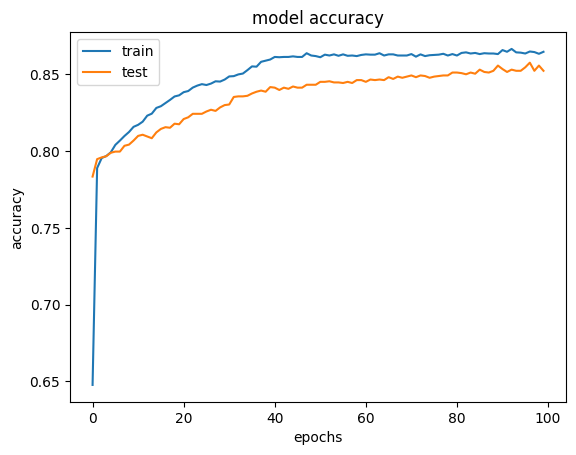

In [33]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

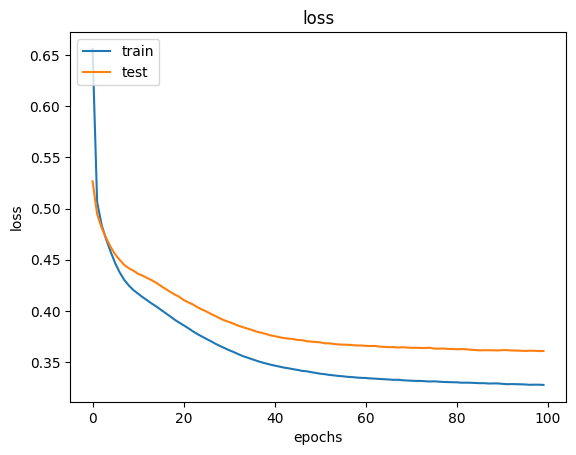

In [34]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [35]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 2ms/step


In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [37]:
cm

array([[1508,   87],
       [ 199,  206]])

In [38]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [39]:
score

0.857